# Tanpa Penanganan Penanganan Ketakseimbangan Data

In [42]:
# Mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_roc_curve

In [43]:
# Mengatur pandas agar mengeluarkan output untuk melihat keseluruhan kolom data
pd.set_option('display.max_columns', None) 

## Input Data

In [44]:
# Input Data 
df = pd.read_csv("data_integrasi_ta.csv", index_col="RENUM")
df.head()

,Luas lantai rumah,Jenis lantai rumah,Jenis dinding rumah,Fasilitas tempat buang air besar,Sumber air minum,Jenis bahan bakar,Sumber penerangan,Pernah tidak makan dalam sehari,Pernah melewatkan satu waktu makan dalam sehari,Kepemilikan kulkas,Kepemilikan AC,Kepemilikan perahu,Kepemilikan perahu motor,Kepemilikan pemanas air,Kepemilikan telepon rumah,Kepemilikan komputer,Kepemilikan emas,Kepemilikan sepeda motor,Kepemilikan mobil,Kepemilikan televisi,Kepemilikan tanah,Status tempat tinggal,Kemampuan KRT berobat ke puskesmas,Kepemilikan rekening tabungan KRT,Pendidikan tertinggi KRT,Lapangan pekerjaan KRT,Status RT
RENUM,,,,,,,,,,,,,,,,,,,,,,,,,,,
204022,9,6,4,2,2,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,7.0,24.0,0
204028,6,6,1,2,2,4,1,2,2,0,0,0,0,0,0,0,0,1,0,0,0,3,0,1,11.0,12.0,0
204436,8,2,1,1,1,4,2,2,2,0,0,0,0,0,0,1,0,1,0,0,0,2,0,1,11.0,19.0,0
204437,75,2,1,1,1,4,1,2,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,18.0,14.0,0
204441,15,4,1,2,2,4,1,2,2,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,11.0,12.0,0


In [45]:
# Melihat jumlah dari setiap kategori variabel respon Status RT
df['Status RT'].value_counts()

0    5953
1     278
Name: Status RT, dtype: int64

In [46]:
# Mengubah tipe variabel
df["Pendidikan tertinggi KRT"] = df["Pendidikan tertinggi KRT"].astype("Int64")
df["Lapangan pekerjaan KRT"] = df["Lapangan pekerjaan KRT"].astype("Int64")

In [47]:
# Melihat lima data teratas
df.head()

,Luas lantai rumah,Jenis lantai rumah,Jenis dinding rumah,Fasilitas tempat buang air besar,Sumber air minum,Jenis bahan bakar,Sumber penerangan,Pernah tidak makan dalam sehari,Pernah melewatkan satu waktu makan dalam sehari,Kepemilikan kulkas,Kepemilikan AC,Kepemilikan perahu,Kepemilikan perahu motor,Kepemilikan pemanas air,Kepemilikan telepon rumah,Kepemilikan komputer,Kepemilikan emas,Kepemilikan sepeda motor,Kepemilikan mobil,Kepemilikan televisi,Kepemilikan tanah,Status tempat tinggal,Kemampuan KRT berobat ke puskesmas,Kepemilikan rekening tabungan KRT,Pendidikan tertinggi KRT,Lapangan pekerjaan KRT,Status RT
RENUM,,,,,,,,,,,,,,,,,,,,,,,,,,,
204022,9,6,4,2,2,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,7,24,0
204028,6,6,1,2,2,4,1,2,2,0,0,0,0,0,0,0,0,1,0,0,0,3,0,1,11,12,0
204436,8,2,1,1,1,4,2,2,2,0,0,0,0,0,0,1,0,1,0,0,0,2,0,1,11,19,0
204437,75,2,1,1,1,4,1,2,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,18,14,0
204441,15,4,1,2,2,4,1,2,2,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,11,12,0


## Dataset Splitting

In [48]:
# Data yang terdiri dari variabel prediktor
X = df.drop(columns="Status RT")

# Data yang terdiri dari variabel respon
y = df["Status RT"]

# Membagi data menjadi data training dan data testing dengan perbandingan (70:30) dengan skema stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Melihat ukuran data setelah di bagi
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4361, 26), (1870, 26), (4361,), (1870,))

In [49]:
# Melihat jumlah dari setiap kategori variabel respon pada data training
print(y_train.value_counts())

# Melihat jumlah dari setiap kategori variabel respon pada data testing
print(y_test.value_counts())

0    4166
1     195
Name: Status RT, dtype: int64
0    1787
1      83
Name: Status RT, dtype: int64


In [50]:
# Melihat kolom yang tersedia pada data
df.columns

Index(['Luas lantai rumah', 'Jenis lantai rumah', 'Jenis dinding rumah',
       'Fasilitas tempat buang air besar', 'Sumber air minum',
       'Jenis bahan bakar', 'Sumber penerangan',
       'Pernah tidak makan dalam sehari',
       'Pernah melewatkan satu waktu makan dalam sehari', 'Kepemilikan kulkas',
       'Kepemilikan AC', 'Kepemilikan perahu', 'Kepemilikan perahu motor',
       'Kepemilikan pemanas air', 'Kepemilikan telepon rumah',
       'Kepemilikan komputer', 'Kepemilikan emas', 'Kepemilikan sepeda motor',
       'Kepemilikan mobil', 'Kepemilikan televisi', 'Kepemilikan tanah',
       'Status tempat tinggal', 'Kemampuan KRT berobat ke puskesmas',
       'Kepemilikan rekening tabungan KRT', 'Pendidikan tertinggi KRT',
       'Lapangan pekerjaan KRT', 'Status RT'],
      dtype='object')

## Preprocessing

Membuat pipeline untuk variabel numerik untuk dilakukan prapemrosesan data sebelum dilakukan pemodelan.

In [51]:
# Pipeline untuk variabel numerik, mengisi missing value dengan nilai median
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

# Pipeline untuk variabel kategorik, mengisi missing value dengan nilai modus
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

# Menempatkan setiap variabel sesuai dengan pipelinenya
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ['Luas lantai rumah']),
    ("categoric", categorical_pipeline,['Jenis lantai rumah', 'Jenis dinding rumah',
       'Fasilitas tempat buang air besar', 'Sumber air minum',
       'Jenis bahan bakar', 'Sumber penerangan',
       'Pernah tidak makan dalam sehari',
       'Pernah melewatkan satu waktu makan dalam sehari', 'Kepemilikan kulkas',
       'Kepemilikan AC', 'Kepemilikan perahu', 'Kepemilikan perahu motor',
       'Kepemilikan pemanas air', 'Kepemilikan telepon rumah',
       'Kepemilikan komputer', 'Kepemilikan emas', 'Kepemilikan sepeda motor',
       'Kepemilikan mobil', 'Kepemilikan televisi', 'Kepemilikan tanah',
       'Status tempat tinggal', 'Kemampuan KRT berobat ke puskesmas',
       'Kepemilikan rekening tabungan KRT', 'Pendidikan tertinggi KRT',
       'Lapangan pekerjaan KRT'])
])

## Pipeline Training

In [52]:
# Pipeline untuk preprocessing dan modeling
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=1))
])

# Hyperparameter yang akan dituning
parameter = {
    'algo__n_estimators': [50, 100, 500, 1000],
    'algo__max_features': ['sqrt', 'log2'],
}


# Mendefinisikaan stratified cross validation dengan k=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Modeling dan hyperparameter tuning dengan grid search cv dan scoring f1 score
model = GridSearchCV(pipeline, parameter, cv=cv, scoring='f1', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

# Print hasil hyperparameter terbaik dari hyperparameter tuning
print(model.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.0s finished


{'algo__max_features': 'sqrt', 'algo__n_estimators': 100}


Diperoleh hyperparameter terbaik untuk max features adalah **sqrt** dan n estimator adalah **100**.

In [53]:
# Hasil grid search CV setiap kombinasi hyperparameter
gridsearchcv = pd.DataFrame({'max_features': model.cv_results_['param_algo__max_features'], 
                              'n_estimators': model.cv_results_['param_algo__n_estimators'],
                              'Tes skor fold 1': model.cv_results_['split0_test_score'],
                              'Tes skor fold 2': model.cv_results_['split1_test_score'],
                              'Tes skor fold 3': model.cv_results_['split2_test_score'],
                              'Tes skor fold 4': model.cv_results_['split3_test_score'],
                              'Tes skor fold 5': model.cv_results_['split4_test_score'],
                              'Rata-rata tes skor': model.cv_results_['mean_test_score'],
                              'Rank tes skor': model.cv_results_['rank_test_score']})
gridsearchcv = gridsearchcv.sort_values(by=['Rank tes skor'])
gridsearchcv

,max_features,n_estimators,Tes skor fold 1,Tes skor fold 2,Tes skor fold 3,Tes skor fold 4,Tes skor fold 5,Rata-rata tes skor,Rank tes skor
1,sqrt,100,0.090909,0.044444,0.0,0.0,0.000000,0.027071,1
2,sqrt,500,0.047619,0.086957,0.0,0.0,0.000000,0.026915,2
4,log2,50,0.000000,0.000000,0.0,0.0,0.093023,0.018605,3
3,sqrt,1000,0.047619,0.000000,0.0,0.0,0.000000,0.009524,4
6,log2,500,0.047619,0.000000,0.0,0.0,0.000000,0.009524,4
7,log2,1000,0.047619,0.000000,0.0,0.0,0.000000,0.009524,4
5,log2,100,0.046512,0.000000,0.0,0.0,0.000000,0.009302,7
0,sqrt,50,0.044444,0.000000,0.0,0.0,0.000000,0.008889,8


In [54]:
# Eksport ke CSV file
gridsearchcv.to_excel('gridsearchcv_rf.xlsx', index=False)

In [55]:
# Pipeline untuk preprocessing dan modeling
model = Pipeline([('prep', preprocessor),  
                  ('algo', RandomForestClassifier(n_estimators=100, max_features='sqrt', 
                                                     n_jobs=-1, verbose=1, random_state=1))])
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Luas lantai rumah']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Jenis lantai rumah',
                                                   'Jenis dinding rumah',
                                                   'Fasilitas tempat buang air '
                                                   'besar',
                                                   'Sumber air minum',
                                               

## Evaluasi Model

Evaluasi model menggunakan data testing.

In [56]:
# Indikator kriteria untuk evaluasi model
y_test_predict = model.predict(X_test)

cm_model = confusion_matrix(y_test, y_test_predict)

accuracy_model = accuracy_score(y_test, y_test_predict)
precision_model = precision_score(y_test, y_test_predict)
recall_model = recall_score(y_test, y_test_predict)
f1_score_model = f1_score(y_test, y_test_predict)
specificity_model = cm_model[0][0]/(cm_model[0][0]+cm_model[0][1])

print(f"Accuracy Score: {accuracy_model}")
print(f"Precision Score: {precision_model}")
print(f"Recall Score: {recall_model}")
print(f"F1 Score: {f1_score_model}")
print(f"Specificity: {specificity_model}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy Score: 0.955614973262032
Precision Score: 0.5
Recall Score: 0.024096385542168676
F1 Score: 0.04597701149425288
Specificity: 0.9988808058198098


In [57]:
# Nilai AUC
fpr_model, tpr_model, thresholds_model = roc_curve(y_test, model.predict_proba(X_test)[:,1])
AUC_model = auc(fpr_model, tpr_model)
print(AUC_model)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


0.8114494913060188


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


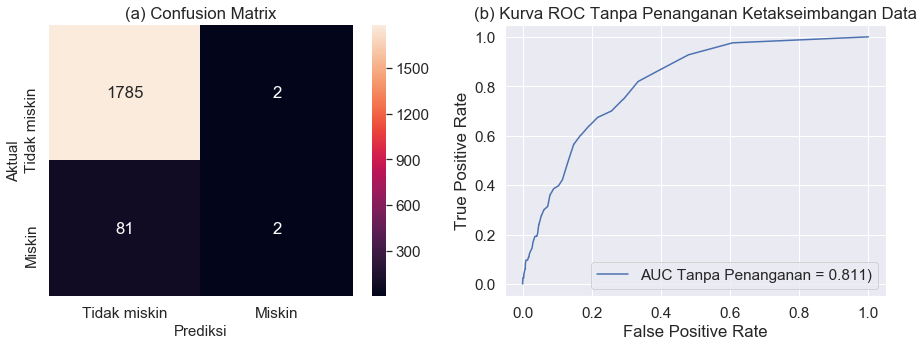

In [84]:
# Plot Gabungan Model Tanpa Penanganan Ketakseimbangan Data
fig = plt.figure(figsize=(15,5))     

ax= plt.subplot(121)
sns.set(font_scale=1.4)
sns.heatmap(cm_model, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prediksi', fontsize=15)
ax.set_ylabel('Aktual', fontsize=15); 
ax.set_title('(a) Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Tidak miskin', 'Miskin'])
ax.yaxis.set_ticklabels(['Tidak miskin', 'Miskin'])


ax2= plt.subplot(122)
sns.lineplot(fpr_model, tpr_model, label='AUC Tanpa Penanganan = %0.3f)' % AUC_model,ax=ax2)
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("(b) Kurva ROC Tanpa Penanganan Ketakseimbangan Data")
plt.legend(loc="lower right")

plt.show()

# Penanganan Dengan Random Undersampling

In [59]:
# Mengimport library yang dibutuhkan
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

## Preprocessing

In [60]:
# Pipeline untuk variabel numerik, mengisi missing value dengan nilai median
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

# Pipeline untuk variabel kategorik, mengisi missing value dengan nilai modus
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

# Menempatkan setiap variabel sesuai dengan pipelinenya
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ['Luas lantai rumah']),
    ("categoric", categorical_pipeline,['Jenis lantai rumah', 'Jenis dinding rumah',
       'Fasilitas tempat buang air besar', 'Sumber air minum',
       'Jenis bahan bakar', 'Sumber penerangan',
       'Pernah tidak makan dalam sehari',
       'Pernah melewatkan satu waktu makan dalam sehari', 'Kepemilikan kulkas',
       'Kepemilikan AC', 'Kepemilikan perahu', 'Kepemilikan perahu motor',
       'Kepemilikan pemanas air', 'Kepemilikan telepon rumah',
       'Kepemilikan komputer', 'Kepemilikan emas', 'Kepemilikan sepeda motor',
       'Kepemilikan mobil', 'Kepemilikan televisi', 'Kepemilikan tanah',
       'Status tempat tinggal', 'Kemampuan KRT berobat ke puskesmas',
       'Kepemilikan rekening tabungan KRT', 'Pendidikan tertinggi KRT',
       'Lapangan pekerjaan KRT'])
])

## Pipeline Training

In [61]:
# Pipeline untuk preprocessing dan modeling
model_rus = Pipeline([('prep', preprocessor), 
                     ('under', RandomUnderSampler(random_state=1)), 
                     ('algo', RandomForestClassifier(n_estimators=100, max_features='sqrt', 
                                                    n_jobs=-1, verbose=1, random_state=1))])
model_rus.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Luas lantai rumah']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Jenis lantai rumah',
                                                   'Jenis dinding rumah',
                                                   'Fasilitas tempat buang air '
                                                   'besar',
                                                   'Sumber air minum',
                                               

In [62]:
# Melihat data setelah random undersampling
X_train_rus, y_train_rus = model_rus.named_steps['under'].fit_resample(X_train, y_train)
y_train_rus.value_counts()

1    195
0    195
Name: Status RT, dtype: int64

## Evaluasi Model

In [63]:
# Indikator kriteria untuk evaluasi model 
y_test_predict = model_rus.predict(X_test)

cm_rus = confusion_matrix(y_test, y_test_predict)

accuracy_rus = accuracy_score(y_test, y_test_predict)
precision_rus = precision_score(y_test, y_test_predict)
recall_rus = recall_score(y_test, y_test_predict)
f1_score_rus = f1_score(y_test, y_test_predict)
specificity_rus = cm_rus[0][0]/(cm_rus[0][0]+cm_rus[0][1])

print(f"Accuracy Score: {accuracy_rus}")
print(f"Precision Score: {precision_rus}")
print(f"Recall Score: {recall_rus}")
print(f"F1 Score: {f1_score_rus}")
print(f"Specificity: {specificity_rus}")

Accuracy Score: 0.667379679144385
Precision Score: 0.10656934306569343
Recall Score: 0.8795180722891566
F1 Score: 0.19010416666666666
Specificity: 0.6575265808617795


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [64]:
# Nilai AUC
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, model_rus.predict_proba(X_test)[:,1])
AUC_rus = auc(fpr_rus, tpr_rus)
print(AUC_rus)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8415564889664983


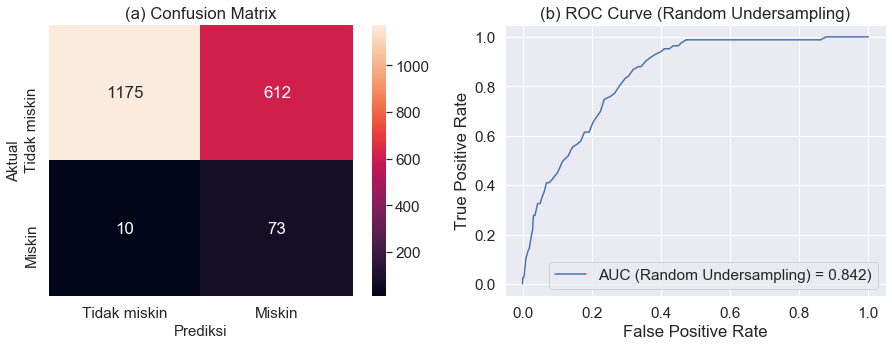

In [65]:
# Plot Gabungan Model dengan Random Undersampling
fig = plt.figure(figsize=(15,5))     

ax= plt.subplot(121)
sns.set(font_scale=1.4)
sns.heatmap(cm_rus, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prediksi', fontsize=15)
ax.set_ylabel('Aktual', fontsize=15); 
ax.set_title('(a) Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Tidak miskin', 'Miskin'])
ax.yaxis.set_ticklabels(['Tidak miskin', 'Miskin'])


ax2= plt.subplot(122)
sns.lineplot(fpr_rus, tpr_rus, label='AUC (Random Undersampling) = %0.3f)' % AUC_rus, ax=ax2)
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("(b) ROC Curve (Random Undersampling)")
plt.legend(loc="lower right")

plt.show()

# Penanganan Dengan Random Oversampling

In [66]:
# Mengimport library yang dibutuhkan
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

## Preprocessing

In [67]:
# Pipeline untuk variabel numerik, mengisi missing value dengan nilai median
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

# Pipeline untuk variabel kategorik, mengisi missing value dengan nilai modus
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

# Menempatkan setiap variabel sesuai dengan pipelinenya
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ['Luas lantai rumah']),
    ("categoric", categorical_pipeline,['Jenis lantai rumah', 'Jenis dinding rumah',
       'Fasilitas tempat buang air besar', 'Sumber air minum',
       'Jenis bahan bakar', 'Sumber penerangan',
       'Pernah tidak makan dalam sehari',
       'Pernah melewatkan satu waktu makan dalam sehari', 'Kepemilikan kulkas',
       'Kepemilikan AC', 'Kepemilikan perahu', 'Kepemilikan perahu motor',
       'Kepemilikan pemanas air', 'Kepemilikan telepon rumah',
       'Kepemilikan komputer', 'Kepemilikan emas', 'Kepemilikan sepeda motor',
       'Kepemilikan mobil', 'Kepemilikan televisi', 'Kepemilikan tanah',
       'Status tempat tinggal', 'Kemampuan KRT berobat ke puskesmas',
       'Kepemilikan rekening tabungan KRT', 'Pendidikan tertinggi KRT',
       'Lapangan pekerjaan KRT'])
])

## Pipeline Training

In [68]:
# Pipeline untuk preprocessing dan modeling
model_ros = Pipeline([('prep', preprocessor),
                     ('over', RandomOverSampler(random_state=1)),  
                     ('algo', RandomForestClassifier(n_estimators=100, max_features='sqrt', 
                                                     n_jobs=-1, verbose=1, random_state=22))])
model_ros.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Luas lantai rumah']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Jenis lantai rumah',
                                                   'Jenis dinding rumah',
                                                   'Fasilitas tempat buang air '
                                                   'besar',
                                                   'Sumber air minum',
                                               

In [69]:
# Melihat data setelah random oversampling
X_train_ros, y_train_ros = model_ros.named_steps['over'].fit_resample(X_train, y_train)
y_train_ros.value_counts()

1    4166
0    4166
Name: Status RT, dtype: int64

## Evaluasi Model

In [70]:
# Indikator kriteria untuk evaluasi model
y_test_predict = model_ros.predict(X_test)

cm_ros = confusion_matrix(y_test, y_test_predict)

accuracy_ros = accuracy_score(y_test, y_test_predict)
precision_ros = precision_score(y_test, y_test_predict)
recall_ros = recall_score(y_test, y_test_predict)
f1_score_ros = f1_score(y_test, y_test_predict)
specificity_ros = cm_ros[0][0]/(cm_ros[0][0]+cm_ros[0][1])

print(f"Accuracy Score: {accuracy_ros}")
print(f"Precision Score: {precision_ros}")
print(f"Recall Score: {recall_ros}")
print(f"F1 Score: {f1_score_ros}")
print(f"Specificity: {specificity_ros}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy Score: 0.9529411764705882
Precision Score: 0.3076923076923077
Recall Score: 0.04819277108433735
F1 Score: 0.08333333333333334
Specificity: 0.9949636261891438


In [71]:
# Nilai AUC
fpr_ros, tpr_ros, thresholds_ros = roc_curve(y_test, model_ros.predict_proba(X_test)[:,1])
AUC_ros = auc(fpr_ros, tpr_ros)
print(AUC_ros)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8161217899016322


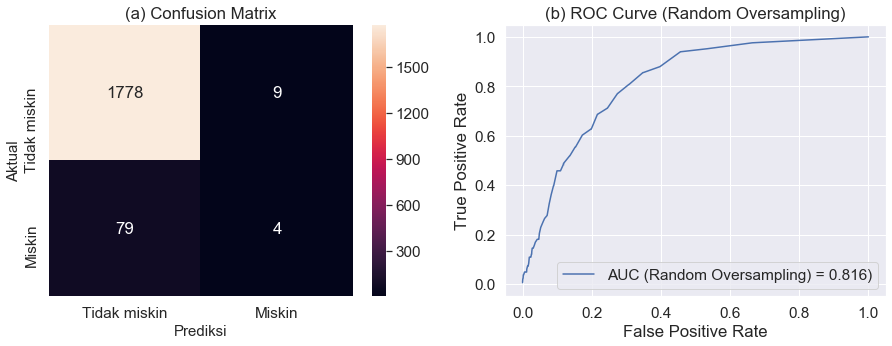

In [72]:
# Plot Gabungan Model dengan Random Oversampling
fig = plt.figure(figsize=(15,5))     

ax= plt.subplot(121)
sns.set(font_scale=1.4)
sns.heatmap(cm_ros, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prediksi', fontsize=15)
ax.set_ylabel('Aktual', fontsize=15); 
ax.set_title('(a) Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Tidak miskin', 'Miskin'])
ax.yaxis.set_ticklabels(['Tidak miskin', 'Miskin'])


ax2= plt.subplot(122)
sns.lineplot(fpr_ros, tpr_ros, label='AUC (Random Oversampling) = %0.3f)' % AUC_ros, ax=ax2)
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("(b) ROC Curve (Random Oversampling)")
plt.legend(loc="lower right")

plt.show()

# Penanganan Dengan SMOTE

Karena data terdiri dari variabel numerik dan kategorik maka metode SMOTE yang digunakan adalah SMOTENC.

In [73]:
# Mengimport library yang dibutuhkan
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC

## Preprocessing

In [74]:
# Pipeline untuk variabel numerik, mengisi missing value dengan nilai median
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

# Pipeline untuk variabel kategorik, mengisi missing value dengan nilai modus
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

# Menempatkan setiap variabel sesuai dengan pipelinenya
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ['Luas lantai rumah']),
    ("categoric", categorical_pipeline,['Jenis lantai rumah', 'Jenis dinding rumah',
       'Fasilitas tempat buang air besar', 'Sumber air minum',
       'Jenis bahan bakar', 'Sumber penerangan',
       'Pernah tidak makan dalam sehari',
       'Pernah melewatkan satu waktu makan dalam sehari', 'Kepemilikan kulkas',
       'Kepemilikan AC', 'Kepemilikan perahu', 'Kepemilikan perahu motor',
       'Kepemilikan pemanas air', 'Kepemilikan telepon rumah',
       'Kepemilikan komputer', 'Kepemilikan emas', 'Kepemilikan sepeda motor',
       'Kepemilikan mobil', 'Kepemilikan televisi', 'Kepemilikan tanah',
       'Status tempat tinggal', 'Kemampuan KRT berobat ke puskesmas',
       'Kepemilikan rekening tabungan KRT', 'Pendidikan tertinggi KRT',
       'Lapangan pekerjaan KRT'])
])

## Pipeline Training

In [75]:
# Variabel prediktor yang termasuk variabel kategorik
cat_indices = [1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

In [76]:
# Pipeline untuk preprocessing dan modeling
model_smotenc = Pipeline([('prep', preprocessor), 
                     ('smotenc', SMOTENC(categorical_features=cat_indices, random_state=1)), 
                     ('algo', RandomForestClassifier(n_estimators=100, max_features='sqrt', 
                                                     n_jobs=-1, verbose=1, random_state=1))])
model_smotenc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Luas lantai rumah']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Jenis lantai rumah',
                                                   'Jenis dinding rumah',
                                                   'Fasilitas tempat buang air '
                                                   'besar',
                                                   'Sumber air minum',
                                               

## Evaluasi Model

In [77]:
# Indikator kriteria untuk evaluasi model
y_test_predict = model_smotenc.predict(X_test)

cm_smotenc = confusion_matrix(y_test, y_test_predict)

accuracy_smotenc = accuracy_score(y_test, y_test_predict)
precision_smotenc = precision_score(y_test, y_test_predict)
recall_smotenc = recall_score(y_test, y_test_predict)
f1_score_smotenc = f1_score(y_test, y_test_predict)
specificity_smotenc = cm_smotenc[0][0]/(cm_smotenc[0][0]+cm_smotenc[0][1])

print(f"Accuracy Score: {accuracy_smotenc}")
print(f"Precision Score: {precision_smotenc}")
print(f"Recall Score: {recall_smotenc}")
print(f"F1 Score: {f1_score_smotenc}")
print(f"Specificty: {specificity_smotenc}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy Score: 0.9352941176470588
Precision Score: 0.1935483870967742
Recall Score: 0.14457831325301204
F1 Score: 0.16551724137931034
Specificty: 0.9720201454952434


In [78]:
# Nilai AUC
fpr_smotenc, tpr_smotenc, threshold_smotenc = roc_curve(y_test, model_smotenc.predict_proba(X_test)[:,1])
AUC_smotenc = auc(fpr_smotenc, tpr_smotenc)
print(AUC_smotenc)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8218930562765893


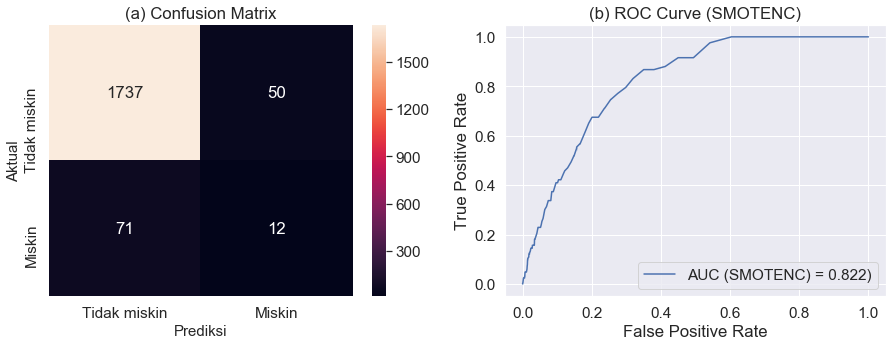

In [79]:
# Plot Gabungan Model dengan SMOTENC
fig = plt.figure(figsize=(15,5))     

ax= plt.subplot(121)
sns.set(font_scale=1.4)
sns.heatmap(cm_smotenc, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prediksi', fontsize=15)
ax.set_ylabel('Aktual', fontsize=15); 
ax.set_title('(a) Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Tidak miskin', 'Miskin'])
ax.yaxis.set_ticklabels(['Tidak miskin', 'Miskin'])


ax2= plt.subplot(122)
sns.lineplot(fpr_smotenc, tpr_smotenc, label='AUC (SMOTENC) = %0.3f)' % AUC_smotenc, ax=ax2)
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("(b) ROC Curve (SMOTENC)")
plt.legend(loc="lower right")

plt.show()

# Rangkuman Hasil Evaluasi Model

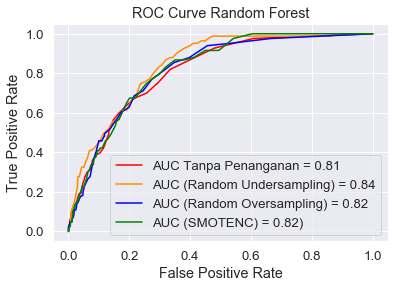

In [80]:
# Plot Kurva ROC dari keseluruhan model
plt.figure()

sns.set(font_scale=1.2)
plt.plot(fpr_model, tpr_model, label='AUC Tanpa Penanganan = %0.2f' % AUC_model, color = 'red')
plt.plot(fpr_rus, tpr_rus, label='AUC (Random Undersampling) = %0.2f' % AUC_rus, color='darkorange')
plt.plot(fpr_ros, tpr_ros, label='AUC (Random Oversampling) = %0.2f' % AUC_ros, color ='blue')
plt.plot(fpr_smotenc, tpr_smotenc, label='AUC (SMOTENC) = %0.2f)' % AUC_smotenc, color='green')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Random Forest")
plt.legend(loc="lower right")

plt.show()

In [81]:
# Indikator kriteria untuk evaluasi dari keseluruhan model
hasil_rf = pd.DataFrame({'Model' : ['Model Tanpa Penanganan', 'Model Random Undersampling', 'Model Random Oversampling', 'SMOTENC'],
    'Accuracy' : [accuracy_model, accuracy_rus, accuracy_ros, accuracy_smotenc],
    'Precision' : [precision_model, precision_rus, precision_ros, precision_smotenc],
    'Recall': [recall_model, recall_rus, recall_ros, recall_smotenc],
    'Specificity' : [specificity_model, specificity_rus, specificity_ros, specificity_smotenc],
    'F1 Score' : [f1_score_model, f1_score_rus, f1_score_ros, f1_score_smotenc],
    'AUC': [AUC_model, AUC_rus, AUC_ros, AUC_smotenc]
})
hasil_rf

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,AUC
0,Model Tanpa Penanganan,0.955615,0.500000,0.024096,0.998881,0.045977,0.811449
1,Model Random Undersampling,0.667380,0.106569,0.879518,0.657527,0.190104,0.841556
2,Model Random Oversampling,0.952941,0.307692,0.048193,0.994964,0.083333,0.816122
3,SMOTENC,0.935294,0.193548,0.144578,0.972020,0.165517,0.821893


In [82]:
# Eksport ke CSV file
hasil_rf.to_excel('hasil_rf.xlsx', index=False)